In [14]:
import json
import pandas as pd
from collections import Counter
import tweepy
import textblob
import nltk
import re
from tweepy import OAuthHandler
from textblob import TextBlob
import datetime
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [8]:
consumerkey = "HoeGq9GHuN4Y3ubNIFJFzk9I7"
consumer_secreat = "BUqwoeh7bRaUHRQyv29xvX4sscC9i4F2jFXjJhwAZidnb0IPeN"
Acess_token= "825917096852795392-6H1HxPuVtAjwMD4b7yMzjXqz6fFMkCy"
Acess_secreat = "L6gfpW1e4joUL2JWnuJjVhs79D1YYZVua4QcIRJra9Zxc"


auth = OAuthHandler(consumerkey,consumer_secreat)
auth.set_access_token(Acess_token,Acess_secreat)


api = tweepy.API(auth,parser = tweepy.parsers.JSONParser())


In [4]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [9]:
users = ["@republic","@ndtv","@TimesNow","@CNNnews18"]
sentiments=[]
for target in users:
    print (target)
    counter = 0
    
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list  = []
    public_tweets = api.user_timeline(target,count=200)
    
    #Loop through each tweet
    for tweet in public_tweets:
        
        results = analyzer.polarity_scores(tweet['text'])
        compound = results["compound"]
        pos= results["pos"]
        neg = results["neg"]
        neu = results["neu"]
        tweets_ago = counter
        
        sentiments.append({"Tweet":tweet["text"],"News Org":target,"Tweets Ago":counter,
                           "Date":tweet["created_at"],"compound":compound,"Positive":pos,"Negative":neg,"Neutral":neu})
        
        counter = counter+1

@republic
@ndtv
@TimesNow
@CNNnews18


In [10]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd = sentiments_pd[['News Org','Tweets Ago','Date','Tweet','compound','Positive','Negative','Neutral']]

In [11]:
sentiments_pd.to_csv("News.csv",encoding="utf-8",index = False)

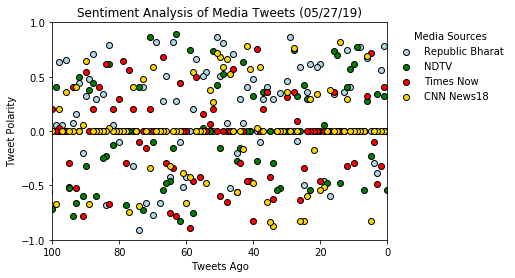

In [12]:
orgs_colors_dict = {'@republic':'lightblue','@ndtv': 'green','@TimesNow': 'red','@IndiaToday': 'blue','@CNNnews18': 'gold'}

plt.scatter(sentiments_pd.groupby(["News Org"]).get_group("@republic")["Tweets Ago"],
                sentiments_pd.groupby(["News Org"]).get_group("@republic")["compound"],
                  facecolors=orgs_colors_dict['@republic'], edgecolors='black', label="Republic Bharat")
plt.scatter(sentiments_pd.groupby(["News Org"]).get_group("@ndtv")["Tweets Ago"],
                sentiments_pd.groupby(["News Org"]).get_group("@ndtv")["compound"],
                  facecolors=orgs_colors_dict['@ndtv'], edgecolors='black', label="NDTV")
plt.scatter(sentiments_pd.groupby(["News Org"]).get_group("@TimesNow")["Tweets Ago"],
                sentiments_pd.groupby(["News Org"]).get_group("@TimesNow")["compound"],
                  facecolors=orgs_colors_dict['@TimesNow'], edgecolors='black', label="Times Now")

plt.scatter(sentiments_pd.groupby(["News Org"]).get_group("@CNNnews18")["Tweets Ago"],
                sentiments_pd.groupby(["News Org"]).get_group("@CNNnews18")["compound"],
                  facecolors=orgs_colors_dict['@CNNnews18'], edgecolors='black', label="CNN News18")

now = datetime.now()
now = now.strftime("%m/%d/%y")
plt.title(f'Sentiment Analysis of Media Tweets ({now})')
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

plt.xlim(100, 0)
plt.ylim(-1.0, 1.0)
yticks = [-1.0, -0.5, 0.0, 0.5, 1.0]
plt.yticks(yticks)

plt.legend(title="Media Sources", bbox_to_anchor=(1, 1), frameon=False)

plt.savefig("sentiment_analysis_of_media_tweets.png")
plt.show()

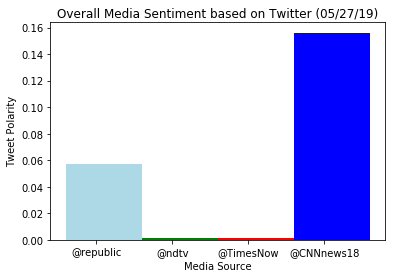

In [16]:
x_axis = np.arange(sentiments_pd["News Org"].nunique())
tick_locations = [value+0.4 for value in x_axis]

plt.title(f'Overall Media Sentiment based on Twitter ({now})')
plt.xlabel("Media Source")
plt.ylabel("Tweet Polarity")

plt.bar(x_axis, sentiments_pd.groupby("News Org").mean()["compound"],
       color=orgs_colors_dict.values(), align="edge", width =1)
plt.xticks(tick_locations, sentiments_pd["News Org"].unique())

plt.savefig("Bar_Sentiment.png")
plt.show()


In [17]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS 
from subprocess import check_output

df = pd.read_csv("News.csv") 
df.head()

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


,News Org,Tweets Ago,Date,Tweet,compound,Positive,Negative,Neutral
0,@republic,0,Mon May 27 06:29:12 +0000 2019,#LIVE on #ModiInVaranasi | Tune in for the wid...,0.0000,0.000,0.000,1.000
1,@republic,1,Mon May 27 06:19:18 +0000 2019,BS Yeddyurappa rules out formation of governme...,0.7783,0.415,0.000,0.585
2,@republic,2,Mon May 27 06:19:10 +0000 2019,Clash between Kangana Ranaut's 'Mental Hai Kya...,0.5574,0.184,0.061,0.755
3,@republic,3,Mon May 27 06:14:28 +0000 2019,WATCH: Ranveer Singh announces his next film '...,-0.3875,0.000,0.168,0.832
4,@republic,4,Mon May 27 06:05:32 +0000 2019,AIMIM chief Asaduddin Owaisi slams Yoga Guru R...,-0.2960,0.000,0.099,0.901


In [18]:
import matplotlib as mpl

In [19]:
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 

In [20]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['Tweet']))


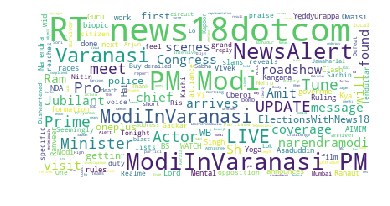

In [21]:
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1000)